In [2]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='ISO-8859-1')

In [4]:
df.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [6]:
df.isnull().sum()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [7]:
df['TIDAL Popularity'].head(5)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: TIDAL Popularity, dtype: float64

In [8]:
df = df.drop(columns=['TIDAL Popularity', 'Soundcloud Streams','SiriusXM Spins'])  


In [9]:
df = df.dropna(thresh=20)  # 至少有20列非空才保留该行


In [10]:
#checking for duplicate values
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    3883
Name: count, dtype: int64

In [11]:
df['Artist'].head(5)

0     Tommy Richman
1    Kendrick Lamar
2           Artemas
3       Miley Cyrus
4            Eminem
Name: Artist, dtype: object

In [12]:
df['Artist'].dropna()

0        Tommy Richman
1       Kendrick Lamar
2              Artemas
3          Miley Cyrus
4               Eminem
             ...      
4595       $uicideboy$
4596        Atif Aslam
4597          Lil Baby
4598      Arijit Singh
4599         Arcï¿½ï¿½
Name: Artist, Length: 3883, dtype: object

In [13]:
df.isnull().sum()

Track                           0
Album Name                      0
Artist                          0
Release Date                    0
ISRC                            0
All Time Rank                   0
Track Score                     0
Spotify Streams                 4
Spotify Playlist Count          0
Spotify Playlist Reach          0
Spotify Popularity            379
YouTube Views                  58
YouTube Likes                  61
TikTok Posts                  615
TikTok Likes                  436
TikTok Views                  437
YouTube Playlist Reach        503
Apple Music Playlist Count     95
AirPlay Spins                 102
Deezer Playlist Count         313
Deezer Playlist Reach         320
Amazon Playlist Count         475
Pandora Streams               507
Pandora Track Stations        650
Shazam Counts                 219
Explicit Track                  0
dtype: int64

In [14]:
df.dropna(inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070 entries, 0 to 4599
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       2070 non-null   object 
 1   Album Name                  2070 non-null   object 
 2   Artist                      2070 non-null   object 
 3   Release Date                2070 non-null   object 
 4   ISRC                        2070 non-null   object 
 5   All Time Rank               2070 non-null   object 
 6   Track Score                 2070 non-null   float64
 7   Spotify Streams             2070 non-null   object 
 8   Spotify Playlist Count      2070 non-null   object 
 9   Spotify Playlist Reach      2070 non-null   object 
 10  Spotify Popularity          2070 non-null   float64
 11  YouTube Views               2070 non-null   object 
 12  YouTube Likes               2070 non-null   object 
 13  TikTok Posts                2070 non-n

In [16]:
df.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",62.0,"17,598,718",114.0,"18,004,655","22,931","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",67.0,"10,422,430",111.0,"7,780,028","28,444","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",136.0,"36,321,847",172.0,"5,022,621","5,639","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799",264.0,"24,684,248",210.0,"190,260,277","203,384","11,822,942",0
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",83.0,"131,148,091","1,392,593","4,202,367","214,943,489","2,938,686,633","2,867,222,632",138.0,"522,042",86.0,"17,167,254",152.0,"138,529,362","50,982","4,517,131",1


## Track Name: Name of the song.
# Album Name: Name of the album the song belongs to.
# Artist: Name of the artist(s) of the song.
# Release Date: Date when the song was released.
# ISRC: International Standard Recording Code for the song.
# All Time Rank: Ranking of the song based on its all-time popularity.
# Track Score: Score assigned to the track based on various factors.
# Spotify Streams: Total number of streams on Spotify.
# Spotify Playlist Count: Number of Spotify playlists the song is included in.
# Spotify Playlist Reach: Reach of the song across Spotify playlists.
# Spotify Popularity: Popularity score of the song on Spotify.
# YouTube Views: Total views of the song's official video on YouTube.
# YouTube Likes: Total likes on the song's official video on YouTube.
# TikTok Posts: Number of TikTok posts featuring the song.
# TikTok Likes: Total likes on TikTok posts featuring the song.
# TikTok Views: Total views on TikTok posts featuring the song.
# YouTube Playlist Reach: Reach of the song across YouTube playlists.
# Apple Music Playlist Count: Number of Apple Music playlists the song is included in.
# AirPlay Spins: Number of times the song has been played on radio stations.
# SiriusXM Spins: Number of times the song has been played on SiriusXM.
# Deezer Playlist Count: Number of Deezer playlists the song is included in.
# Deezer Playlist Reach: Reach of the song across Deezer playlists.
# Amazon Playlist Count: Number of Amazon Music playlists the song is included in.
# Pandora Streams: Total number of streams on Pandora.
# Pandora Track Stations: Number of Pandora stations featuring the song.
# Soundcloud Streams: Total number of streams on Soundcloud.
# Shazam Counts: Total number of times the song has been Shazamed.
# TIDAL Popularity: Popularity score of the song on TIDAL.
# Explicit Track: Indicates whether the song contains explicit content.

In [17]:
columns_to_convert = [
    "Spotify Streams", "Spotify Playlist Count", "Spotify Playlist Reach",
    "YouTube Views", "YouTube Likes", "TikTok Posts", "TikTok Likes", "TikTok Views",
    "YouTube Playlist Reach", "Apple Music Playlist Count", "AirPlay Spins",
    "Deezer Playlist Count", "Deezer Playlist Reach", "Amazon Playlist Count",
    "Pandora Streams", "Pandora Track Stations", "Shazam Counts"
]

# 逐列转换
for col in columns_to_convert:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)



In [18]:
# Description of the Data
df.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Shazam Counts,Explicit Track
count,2070.000000,2.070000e+03,2070.000000,2.070000e+03,2070.000000,2.070000e+03,2.070000e+03,2.070000e+03,2.070000e+03,2.070000e+03,2.070000e+03,2070.000000,2.070000e+03,2070.000000,2.070000e+03,2070.000000,2.070000e+03,2.070000e+03,2.070000e+03,2070.000000
mean,46.886860,6.586295e+08,96009.038164,3.286325e+07,67.772464,5.082184e+08,3.930112e+06,7.470997e+05,1.106177e+08,1.087506e+09,3.903612e+08,80.831884,8.214765e+04,42.005797,1.194576e+06,29.315459,1.175826e+08,1.109337e+05,3.682147e+06,0.394203
std,44.456314,5.469782e+08,75166.344813,3.205233e+07,10.316636,7.645364e+08,5.072436e+06,1.620896e+06,2.269869e+08,2.511685e+09,7.551198e+08,82.836383,1.542436e+05,64.419976,3.505352e+06,28.058034,1.873697e+08,2.804522e+05,4.521954e+06,0.488797
min,19.400000,4.224438e+06,1184.000000,2.402480e+05,1.000000,3.296440e+05,6.449000e+03,1.000000e+00,3.300000e+01,9.390000e+02,6.000000e+00,1.000000,1.000000e+00,1.000000,3.500000e+01,1.000000,8.420000e+02,2.000000e+00,3.110000e+03,0.000000
25%,24.600000,2.577422e+08,40687.750000,1.211867e+07,64.000000,1.005884e+08,9.167548e+05,4.726500e+04,1.125610e+07,1.009359e+08,1.539778e+07,26.000000,3.717250e+03,8.250000,7.553325e+04,10.000000,6.339468e+06,3.725000e+03,8.581085e+05,0.000000
50%,33.000000,5.029847e+08,74540.000000,2.201643e+07,68.000000,2.594174e+08,2.347790e+06,1.865520e+05,3.673315e+07,3.441805e+08,1.288110e+08,54.000000,2.029000e+04,22.000000,2.569855e+05,21.000000,3.645511e+07,1.760700e+04,1.988119e+06,0.000000
75%,51.775000,9.058816e+08,132426.250000,4.143314e+07,74.000000,6.375221e+08,4.886763e+06,7.250382e+05,1.119629e+08,1.026840e+09,3.430375e+08,106.750000,9.899775e+04,46.000000,8.571270e+05,39.000000,1.404539e+08,8.047150e+04,4.617460e+06,1.000000
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,95.000000,1.632276e+10,6.179928e+07,1.889472e+07,4.959549e+09,6.108856e+10,7.289707e+09,859.000000,1.777811e+06,632.000000,4.267518e+07,210.000000,1.463624e+09,3.556791e+06,4.484264e+07,1.000000


In [19]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams               float64
Spotify Playlist Count        float64
Spotify Playlist Reach        float64
Spotify Popularity            float64
YouTube Views                 float64
YouTube Likes                 float64
TikTok Posts                  float64
TikTok Likes                  float64
TikTok Views                  float64
YouTube Playlist Reach        float64
Apple Music Playlist Count    float64
AirPlay Spins                 float64
Deezer Playlist Count         float64
Deezer Playlist Reach         float64
Amazon Playlist Count         float64
Pandora Streams               float64
Pandora Track Stations        float64
Shazam Counts                 float64
Explicit Track                  int64
dtype: objec

In [20]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [21]:
df['Release Month'] = df['Release Date'].dt.month
df['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
5      2023-11-10
          ...    
4584   2020-01-09
4590   2022-05-20
4591   2017-06-23
4597   2020-02-28
4599   2017-04-11
Name: Release Date, Length: 2070, dtype: datetime64[ns]

In [22]:
df['Release Month']

0        4
1        5
2        3
3        1
5       11
        ..
4584     1
4590     5
4591     6
4597     2
4599     4
Name: Release Month, Length: 2070, dtype: int32

In [23]:
df['Release Year'] = df['Release Date'].dt.year
df['Release Year']

0       2024
1       2024
2       2024
3       2023
5       2023
        ... 
4584    2020
4590    2022
4591    2017
4597    2020
4599    2017
Name: Release Year, Length: 2070, dtype: int32

In [24]:
value_counts = df['Artist'].value_counts()

In [25]:
value_counts.head(20)

Artist
Bad Bunny         40
Drake             31
Taylor Swift      28
KAROL G           26
Billie Eilish     21
Ariana Grande     19
Travis Scott      19
The Weeknd        18
Juice WRLD        18
Post Malone       17
Rauw Alejandro    16
Lil Baby          16
Feid              15
J Balvin          15
Kendrick Lamar    15
Doja Cat          14
Justin Bieber     14
Calvin Harris     14
Dua Lipa          13
BLACKPINK         13
Name: count, dtype: int64

In [26]:
numerical_cols = [col for col in df.columns if df[col].dtype not in ['object', 'category', 'datetime64[ns]']]
numerical_cols

['Track Score',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Spotify Popularity',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'Apple Music Playlist Count',
 'AirPlay Spins',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Amazon Playlist Count',
 'Pandora Streams',
 'Pandora Track Stations',
 'Shazam Counts',
 'Explicit Track',
 'Release Month',
 'Release Year']

In [27]:
import plotly.express as px

# 确保 numerical_cols 是 DataFrame，而不是 list
numerical_cols = df.select_dtypes(include=['number'])  # 选择所有数值型列

fig = px.imshow(
    numerical_cols.corr(),  # 计算数值型列的相关性矩阵
    text_auto=True,  # 在热图的格子里显示相关性数值
    height=800,  # 设置图的高度（800 像素）
    width=800,  # 设置图的宽度（800 像素）
    color_continuous_scale=px.colors.sequential.Greens,  # 颜色映射使用绿色
    aspect='auto',  # 自动调整图像的长宽比
    title='<b>Pairwise correlation of columns'  # 设置标题
)

fig.update_layout(title_x=0.5)  # 让标题居中
fig.show()  # 显示图像


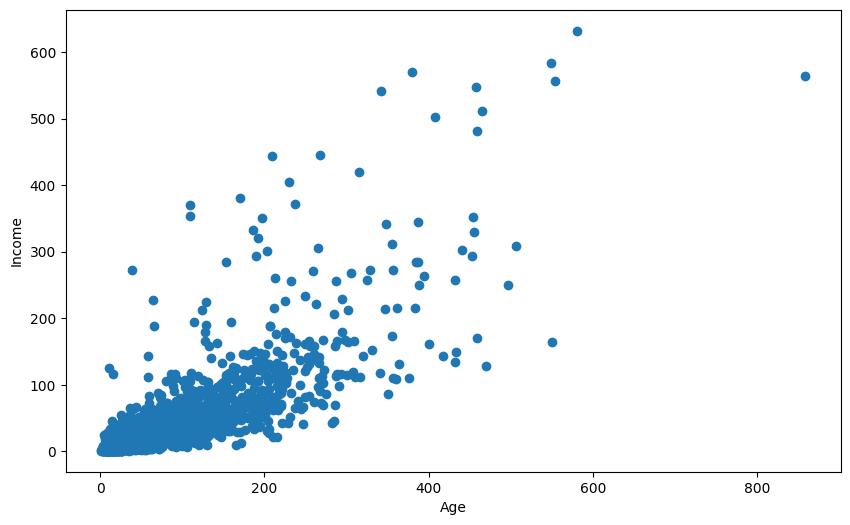

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Apple Music Playlist Count'], df['Deezer Playlist Count'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# EDA

In [31]:
fig=make_subplots(rows=7,cols=3,subplot_titles=('<i>Track Score', '<i>Spotify Streams', '<i>Spotify Playlist Count', '<i>Spotify Playlist Reach', '<i>Spotify Popularity', '<i>YouTube Views', '<i>YouTube Likes', '<i>TikTok Posts', '<i>TikTok Likes', '<i>TikTok Views', '<i>YouTube Playlist Reach', '<i>Apple Music Playlist Count', '<i>AirPlay Spins', '<i>Deezer Playlist Count', '<i>Deezer Playlist Reach', '<i>Amazon Playlist Count', '<i>Pandora Track Stations', '<i>Shazam Counts', '<i>Explicit Track', '<i>Release Month', '<i>Release Year'))
fig.add_trace(go.Histogram(x=df['Track Score'],name='Track Score'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['Spotify Streams'],name='Spotify Streams'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['Spotify Playlist Count'],name='Spotify Playlist Count'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['Spotify Playlist Reach'],name='Spotify Playlist Reach'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['Spotify Popularity'],name='Spotify Popularity'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['YouTube Views'],name='YouTube Views'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['YouTube Likes'],name='YouTube Likes'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['TikTok Posts'],name='TikTok Posts'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['TikTok Likes'],name='TikTok Likes'),row=3,col=3)
fig.add_trace(go.Histogram(x=df['YouTube Playlist Reach'],name='YouTube Playlist Reach'),row=4,col=1)
fig.add_trace(go.Histogram(x=df['Apple Music Playlist Count'],name='Apple Music Playlist Count'),row=4,col=2)
fig.add_trace(go.Histogram(x=df['AirPlay Spins'],name='AirPlay Spins'),row=4,col=3)
fig.add_trace(go.Histogram(x=df['Deezer Playlist Count'],name='Deezer Playlist Count'),row=5,col=1)
fig.add_trace(go.Histogram(x=df['Deezer Playlist Reach'],name='Deezer Playlist Reach'),row=5,col=2)
fig.add_trace(go.Histogram(x=df['Amazon Playlist Count'],name='Amazon Playlist Count'),row=5,col=3)
fig.add_trace(go.Histogram(x=df['Pandora Track Stations'],name='Pandora Track Stations'),row=6,col=1)
fig.add_trace(go.Histogram(x=df['Shazam Counts'],name='Shazam Counts'),row=6,col=2)
fig.add_trace(go.Histogram(x=df['Amazon Playlist Count'],name='Amazon Playlist Count'),row=6,col=3)
fig.add_trace(go.Histogram(x=df['Explicit Track'],name='Explicit Track'),row=7,col=1)
fig.add_trace(go.Histogram(x=df['Release Month'],name='Release Month'),row=7,col=2)
fig.add_trace(go.Histogram(x=df['Release Year'],name='Release Year'),row=7,col=3)
fig.update_layout(height=1200,width=1200,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

In [37]:
# 计算每年发行的歌曲数量
year_counts = df['Release Year'].value_counts().reset_index()
year_counts.columns = ['Release Year', 'Year Count']

# 按年份排序
year_counts = year_counts.sort_values(by='Release Year')

year_counts = year_counts[(year_counts['Release Year'] >= 2015) & (year_counts['Release Year'] <= 2024)]

# 绘制面积图
fig = px.area(year_counts, 
              x='Release Year', 
              y='Year Count', 
              markers=True, 
              labels={'Year Count': 'Total Songs'}, 
              color_discrete_sequence=['green'], 
              title='<b>Year by Year Songs Collection</b>')

fig.update_layout(hovermode='x', title_x=0.5)

# 显示图表
fig.show()